In [71]:
import glob
import os

from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.interpolate import NearestNDInterpolator

In [70]:
filenames = glob.glob('/Users/apricewhelan/data/Isochrones/MIST/FeH_*_iso.fits')

In [85]:
Y = None
y = None
for filename in filenames:
    iso = Table.read(filename)
    iso = iso[iso['log10_isochrone_age_yr'] == 8.2]
    feh = np.repeat(float(os.path.basename(filename).split('_')[1]), len(iso))
    YY = np.stack((feh, iso['log_Teff'], iso['log_g']))
    
    if Y is None:
        Y = YY
        y = iso['initial_mass']
    else:
        Y = np.hstack((Y, YY))
        y = np.concatenate((y, iso['initial_mass']))

Y = Y.T

In [86]:
interp = NearestNDInterpolator(Y, y)

In [46]:
tbl = fits.getdata('/Users/apricewhelan/projects/hq/data/allStarLite-r12-l33.fits')

In [94]:
mask = ((tbl['LOGG'] > 3.5) & (tbl['TEFF'] > 3200) & (tbl['TEFF'] < 7500) & 
        (tbl['M_H'] > -2.) & (tbl['M_H'] < 0.5))

In [95]:
X = np.stack((tbl['M_H'], np.log10(tbl['TEFF']), tbl['LOGG'])).T[mask]

/Users/apricewhelan/anaconda/envs/hq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [96]:
m1 = interp(X)

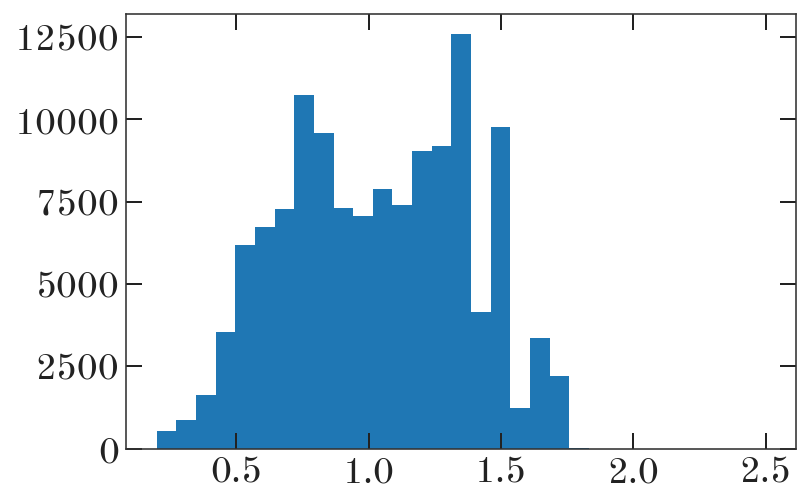

In [97]:
plt.hist(m1, bins=np.linspace(0.2, 2.5, 32));
# plt.yscale('log')

(5.5, 3.5)

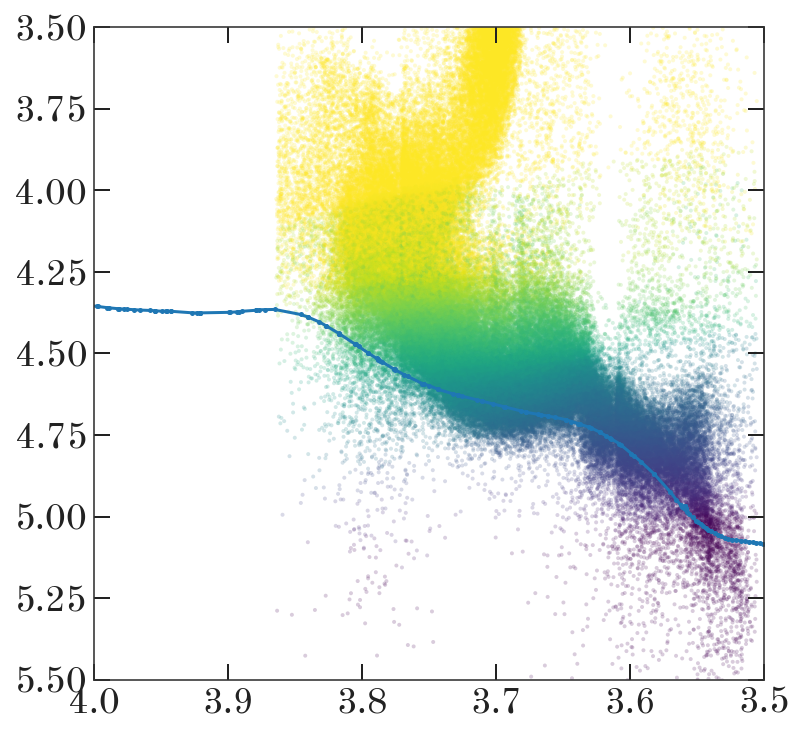

In [98]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 1], X[:, 2], 
            c=m1, vmin=0.2, vmax=1.5, 
            linewidth=0, s=4, alpha=0.2)

plt.plot(iso['log_Teff'], iso['log_g'])

plt.xlim(4, 3.5)
plt.ylim(5.5, 3.5)